<a href="https://colab.research.google.com/github/rigonzal/ML-2019-1/blob/master/Tarea1/Pregunta3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INF-393: Máquinas de Aprendizaje
## Tarea 1 - Pregunta 3
### 26-04-2019


* Rodrigo González - 201303026-2
* Ignacio Valenzuela - 201473055-1


# Introducción

Se usará un dataset respectivo a latidos del corazón para pacientes con cierta condición  el cual debido a su alta dimensionalidad dificulta mucho el análisis. Aquí nace la necesidad de hacer selección de atributos o reducción de estos por medio de una transformación.

# 3. Clasificación

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from google.colab import drive
from sklearn.utils.multiclass import unique_labels

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 3.a Carga de datos

In [0]:
!unzip gdrive/My\ Drive/2019-1/ML/Pregunta\ 1/heartbeat.zip | pwd

/content
unzip:  cannot find or open gdrive/My Drive/2019-1/ML/Pregunta 1/heartbeat.zip, gdrive/My Drive/2019-1/ML/Pregunta 1/heartbeat.zip.zip or gdrive/My Drive/2019-1/ML/Pregunta 1/heartbeat.zip.ZIP.


In [0]:
!mv * gdrive/My\ Drive/2019-1/ML/Pregunta\ 1/

mv: target 'gdrive/My Drive/2019-1/ML/Pregunta 1/' is not a directory


In [0]:
data_normal = pd.read_csv("gdrive/My Drive/Pregunta 1/ptbdb_abnormal.csv",names=[i for i in range(188)] )
data_normal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [0]:
data_abnormal = pd.read_csv("gdrive/My Drive/Pregunta 1/ptbdb_abnormal.csv",names=[i for i in range(188)])
data_abnormal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [0]:
#Sin condición cardiaca
data_normal['target'] = 0
#Con condición cardiaca
data_abnormal['target'] = 1

In [0]:
data = pd.concat([data_normal,data_abnormal])

In [0]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,target
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [0]:
data['target'].value_counts()

1    10506
0    10506
Name: target, dtype: int64

* Disparidad magnitudes

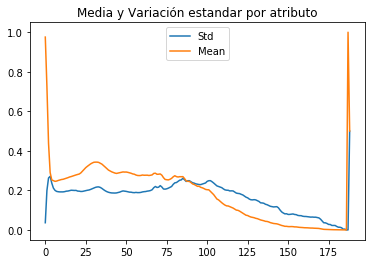

In [0]:
plt.title('Media y Variación estandar por atributo')
_=plt.plot(data.std().values,label='Std')
_=plt.plot(data.mean().values, label = 'Mean')
_ =plt.legend(loc='best')

* Separación de datos:

Separamos en la proporción 75% 15% y 10% para los sets de entrenamiento, validación y pruebas respectivamente.

In [0]:
data_pre_train, data_pre_temp = train_test_split(data, test_size= 0.25)
data_pre_val, data_pre_test = train_test_split(data_pre_temp, test_size= 0.4)
y_pre_train = data_pre_train.pop('target').values
y_pre_val = data_pre_val.pop('target').values
y_pre_test = data_pre_test.pop('target').values

y_pre_train = y_pre_train.reshape(-1,1)
y_pre_val = y_pre_val.reshape(-1,1)
y_pre_test = y_pre_test.reshape(-1,1)

* Estandarizar

Por un lado puede ser bueno estandarizar para tener una variación y media iguales entre columnas. Sin embargo se ahorraría el computo de escalar por como viene set de datos, dado que como apreciamos previamente tienen medias y desviaciones estandar muy similares cada atributo.

* *shuffle= False*

Si no se "barajaban"  los datos totales antes de realizar la división en los sets, se tendrían un desbalance general de clases. Los conjuntos de pruebas y validación habrían quedado solo con la clase con la condición cardiaca, según la proporción que se utilizo para la partición.

## 3.b Correlación

In [0]:
data = data.drop(columns=[184,185,186,187])

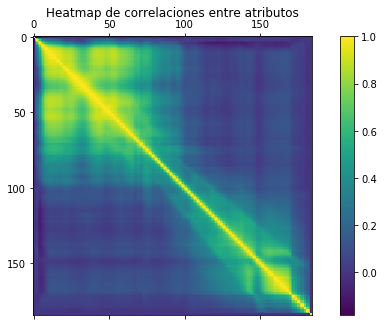

In [0]:
plt.figure(figsize=(10,5))
ax = plt.matshow(data.corr(),fignum=1)
plt.title('Heatmap de correlaciones entre atributos')
_ = plt.colorbar(ax)



Del gráfico podemos inferir que

In [0]:
reg = LogisticRegression(solver = 'liblinear')
reg.fit(data_pre_train, y_pre_train.reshape(len(y_pre_train), ))
score = reg.score(data_pre_val, y_pre_val)
print(score)

0.44525547445255476


In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[570 976]
 [772 833]]


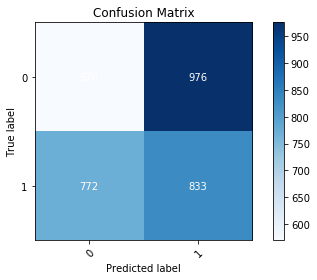

In [0]:
y_hat = reg.predict(data_pre_val)
plot_confusion_matrix(y_pre_val.reshape(len(y_pre_val), ), y_hat, ["0", "1"])